# Fun Predictions
Denna notebok berör några av de dataseten som tillhör samlingen 'Fun'. Målet kommer att vara att se hur väl dessa kan separeras med hjälp av SVM.

#### Importerar bibliotek

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

#### Allmän funktion för att visa upp klusterna i valfritt dataset

In [3]:
def plot_fun_data(df):
    plt.figure(figsize=(8,6))
    plt.scatter(df['x'], df['y'], c=df['color'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

#### Klass som paketerar en LinearSVC med tillhörande variabler och funktioner

In [4]:
class PredictModel:
    def __init__(self, df: pd.DataFrame, target_col: str, svc: LinearSVC|SVC, random_state: int = 309, C: bool = 1) -> None:
        self.df = df
        if svc == LinearSVC:
            self.X = self.df.drop(target_col, axis = 1)
        elif svc == SVC:
            scaler = StandardScaler()
            self.X = scaler.fit_transform(self.df.drop(target_col, axis = 1))
        self.y = self.df[target_col]
        
        self.svc = svc(random_state = random_state, C = C)
        self.svc.fit(self.X, self.y)
        
    def plot(self, show_datapoints: bool = True):
        if type(self.svc) == LinearSVC:
            w = self.svc.coef_[0]
            a = -w[0] / w[1]
            xx = np.linspace(self.df['x'].min() , self.df['x'].max())
            yy = a * xx - (self.svc.intercept_[0]) / w[1]
            plt.plot(xx, yy)
            plt.scatter(self.df['x'], self.df['y'], c=self.y)
        elif type(self.svc) == SVC:
            xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
            Z = self.svc.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
            Z = Z.reshape(xx1.shape)
            plt.contourf(xx1, xx2, Z, alpha=0.1)
            if show_datapoints:
                for cl in np.unique(self.y):
                    plt.scatter(x=self.X[self.y == cl, 0], y=self.X[self.y == cl, 1])
        plt.show()

## Dataset: basic1.csv

#### Importerar och plottar data

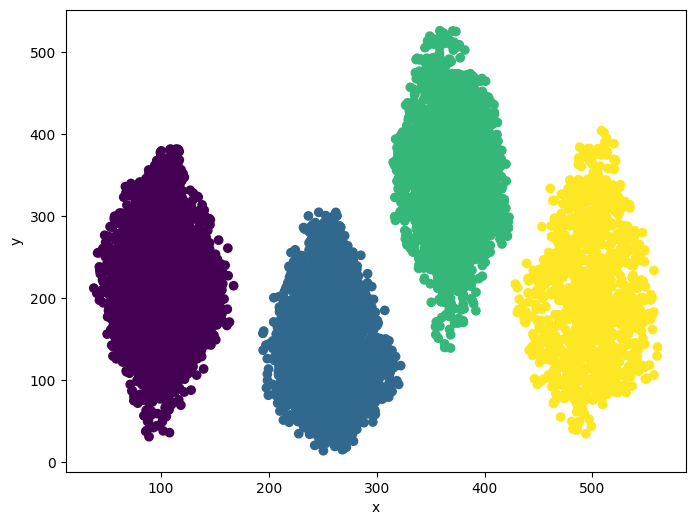

In [5]:
basic1_data = pd.read_csv('basic1.csv')
plot_fun_data(basic1_data)

In [6]:
basic1_data.head()

,x,y,color
0,79.408289,152.834424,0
1,98.046263,186.910700,0
2,240.578979,48.473684,1
3,109.687183,277.945769,0
4,249.626082,229.753352,1


c:\Users\swedm\PythonProgram\Repositories\PublicSchoolGit\School-Work\jupyter-venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


c:\Users\swedm\PythonProgram\Repositories\PublicSchoolGit\School-Work\jupyter-venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


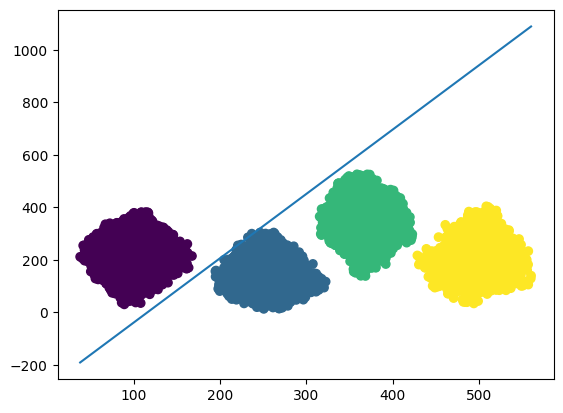

In [7]:
basic_tm = PredictModel(basic1_data, 'color', LinearSVC, random_state=309)
basic_tm.plot()

#### Lastar in datan i modellen

In [8]:
basic1_model = PredictModel(basic1_data, 'color', SVC, random_state = 309)

#### Delar upp och ritar ut kluster

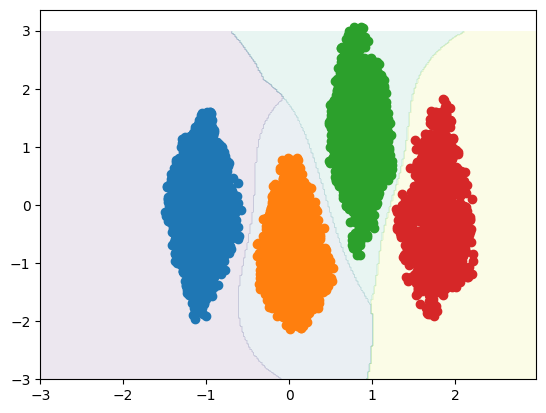

In [9]:
basic1_model.plot()

## Dataset: basic2.csv

#### Importerar och plottar datan

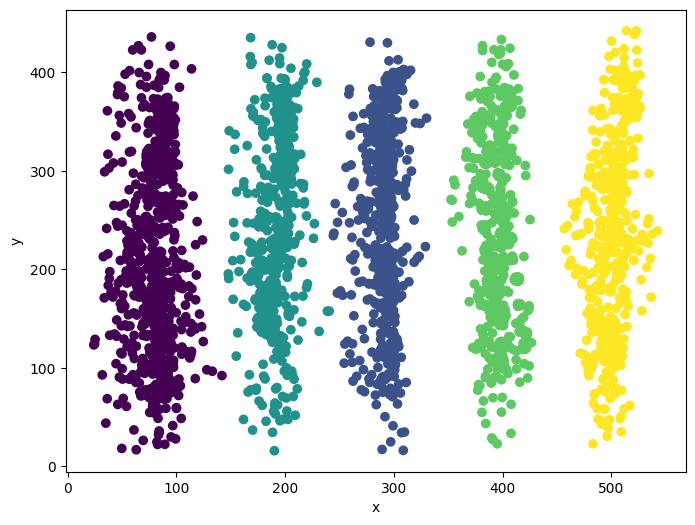

In [10]:
basic2_data = pd.read_csv('basic2.csv')
plot_fun_data(basic2_data)

#### Lastar in datan i modellen

In [11]:
basic2_model = PredictModel(basic2_data, 'color', SVC, random_state = 309)


#### Delar up och ritar ut cluster

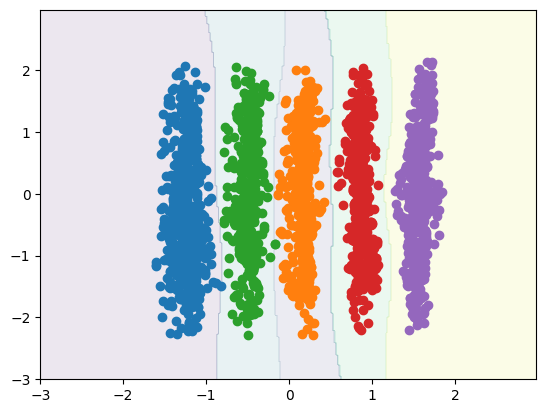

In [12]:
basic2_model.plot()

## Dataset: boxes.csv

#### Importerar och plottar datan

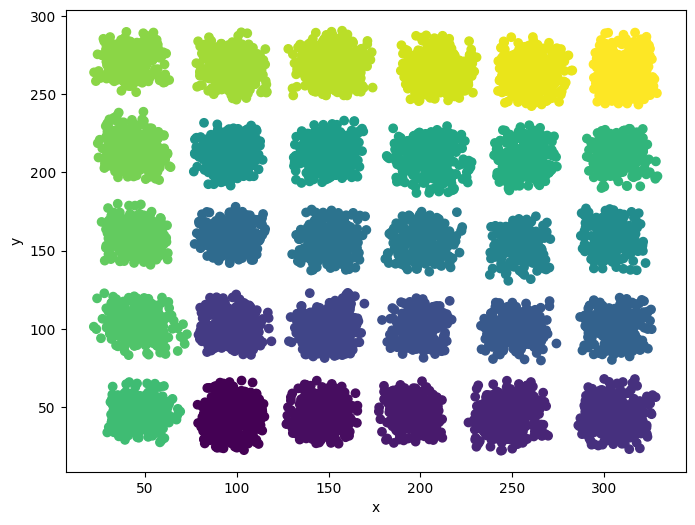

In [13]:
boxes_data = pd.read_csv('boxes.csv')
plot_fun_data(boxes_data)

In [14]:
boxes_data.head()

,x,y,color
0,181.635492,210.485307,17
1,198.440443,223.047363,17
2,43.552279,110.473015,21
3,313.263474,106.631427,9
4,194.493919,144.095507,12


In [15]:
boxes_data.describe()

,x,y,color
count,8901.000000,8901.000000,8901.000000
mean,172.739669,156.868714,14.754971
std,88.701092,82.399390,9.153047
min,22.325370,22.065128,0.000000
25%,96.702032,91.098417,6.000000
50%,160.443638,157.172839,15.000000
75%,251.743988,223.615743,23.000000
max,328.900125,290.490319,29.000000


#### Lastar in datan i modellen

In [16]:
boxes_model = PredictModel(boxes_data, 'color', SVC, random_state = 309)


#### Delar up och ritar ut cluster

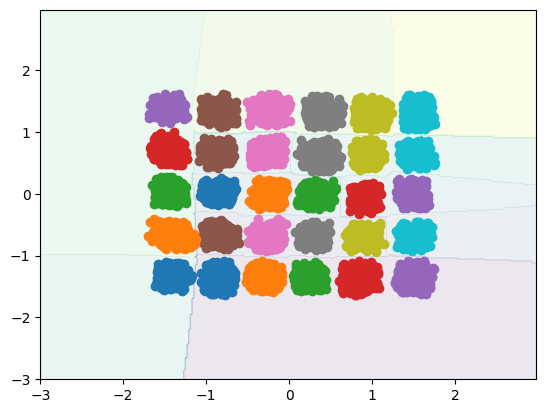

In [17]:
boxes_model.plot()

In [18]:
boxes_model.svc.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)